In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [2]:
digits.images.shape #1797 obrázků o rozměru 8x8

(1797, 8, 8)

In [3]:
print(digits.images[0]) #ukázka jak je obrázek reprezentován každý pixel je definován odstínem šedi

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


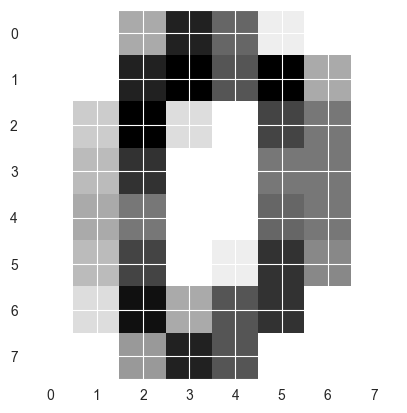

In [4]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap = 'binary')
plt.show()

In [5]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


In [6]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4, 4, j+1)
        plt.imshow(digits.images[i+j], cmap = 'binary')
        plt.title(digits.target[i + j])
        plt.axis('off')
    plt.show()

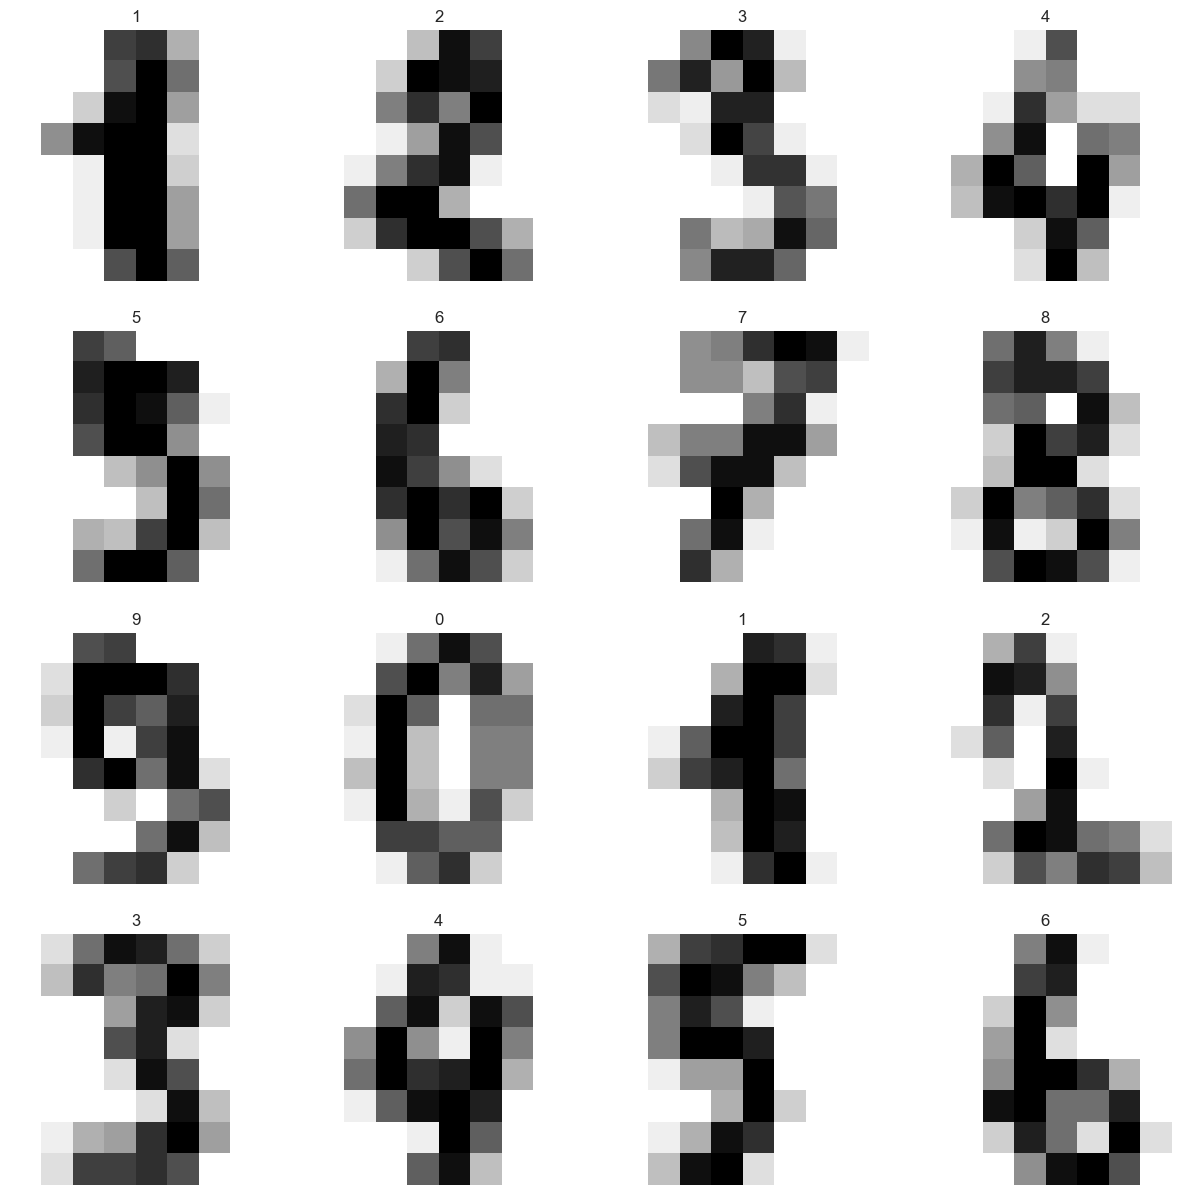

In [31]:
plot_multi(0)

In [8]:
#Přepsání z matice na pole hodnot 8x8 = 64hodnot, aby jsme mohli výstupní vrstvu definovat jako 1rozměrné pole
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

In [10]:
x[0] # vypíše řadu čísel v poli, hodnoty jsou shodné jako v matici

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [23]:
#definujeme neuronku
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4, solver='sgd', tol=1e-4, random_state=1, learning_rate_init=.1, verbose=True)

mlp.fit(x_train, y_train)

Iteration 1, loss = 2.16794941
Iteration 2, loss = 1.70663455
Iteration 3, loss = 1.25754970
Iteration 4, loss = 0.89197189
Iteration 5, loss = 0.63472053
Iteration 6, loss = 0.48548795
Iteration 7, loss = 0.38600523
Iteration 8, loss = 0.31823314
Iteration 9, loss = 0.26594948
Iteration 10, loss = 0.23365638
Iteration 11, loss = 0.20999175
Iteration 12, loss = 0.18762605
Iteration 13, loss = 0.17258181
Iteration 14, loss = 0.15533431
Iteration 15, loss = 0.15296231
Iteration 16, loss = 0.13135678
Iteration 17, loss = 0.12688436
Iteration 18, loss = 0.12248435
Iteration 19, loss = 0.11737047
Iteration 20, loss = 0.10406851
Iteration 21, loss = 0.09394877
Iteration 22, loss = 0.10415101
Iteration 23, loss = 0.08835652
Iteration 24, loss = 0.08268572
Iteration 25, loss = 0.07573047
Iteration 26, loss = 0.07303488
Iteration 27, loss = 0.07231829
Iteration 28, loss = 0.07265900
Iteration 29, loss = 0.07036703
Iteration 30, loss = 0.06359613
Iteration 31, loss = 0.06413452
Iteration 32, los

C:\Users\MiC\Documents\Python\su_cv01\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

In [24]:
predictions = mlp.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9638888888888889

In [26]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test, predictions)

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 45,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 27,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  2, 36]], dtype=int64)

In [30]:
cm(y_test, predictions, normalize='true')

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.96969697, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03030303, 0.        ],
       [0.        , 0.        , 0.        , 0.97058824, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02941176],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.0212766 , 0.        , 0.        ,
        0.95744681, 0.        , 0.        , 0.        , 0.0212766 ],
       [0.02857143, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.97142857, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       